In [ ]:
import pandas as pd

In [ ]:
content_df = pd.read_excel('Content.xlsx')
reactions_df = pd.read_excel('Reactions.xlsx')
reaction_types_df = pd.read_excel('ReactionTypes.xlsx')


In [ ]:
content_df.head(), reactions_df.head(), reaction_types_df.head()

(   Unnamed: 0                            Content ID Content Type  \
 0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2        photo   
 1           1  9f737e0a-3cdd-4d29-9d24-753f4e3be810        photo   
 2           2  230c4e4d-70c3-461d-b42c-ec09396efb3f        photo   
 3           3  356fff80-da4d-4785-9f43-bc1261031dc6        photo   
 4           4  01ab84dd-6364-4236-abbb-3f237db77180        video   
 
          Category  
 0        Studying  
 1  healthy eating  
 2  healthy eating  
 3      technology  
 4            food  ,
    Unnamed: 0                            Content ID        Type  \
 0           1  97522e57-d9ab-4bd6-97bf-c24d952602d2     disgust   
 1           2  97522e57-d9ab-4bd6-97bf-c24d952602d2     dislike   
 2           3  97522e57-d9ab-4bd6-97bf-c24d952602d2      scared   
 3           4  97522e57-d9ab-4bd6-97bf-c24d952602d2     disgust   
 4           5  97522e57-d9ab-4bd6-97bf-c24d952602d2  interested   
 
              Datetime  
 0 2020-11-07 09:43:50

In [ ]:
merged_df = reactions_df.merge(content_df, on='Content ID', how='left')
merged_df.head()

,Unnamed: 0_x,Content ID,Type,Datetime,Unnamed: 0_y,Content Type,Category
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,0,photo,Studying
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,0,photo,Studying
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,0,photo,Studying
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,0,photo,Studying
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,0,photo,Studying


In [ ]:
final_df = merged_df.merge(reaction_types_df, on='Type', how='left')

In [ ]:
final_df.head()

,Unnamed: 0_x,Content ID,Type,Datetime,Unnamed: 0_y,Content Type,Category,Unnamed: 0,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,0,photo,Studying,2,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,0,photo,Studying,11,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,0,photo,Studying,14,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,0,photo,Studying,2,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,0,photo,Studying,4,positive,30


In [ ]:
final_df_cleaned = final_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'])
final_df_cleaned.head()

,Content ID,Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30


In [ ]:
category_scores = final_df_cleaned.groupby('Category')['Score'].sum().reset_index()

top_categories = category_scores.sort_values(by='Score', ascending=False).head(5)

final_df_cleaned.head(), top_categories


(                             Content ID        Type            Datetime  \
 0  97522e57-d9ab-4bd6-97bf-c24d952602d2     disgust 2020-11-07 09:43:50   
 1  97522e57-d9ab-4bd6-97bf-c24d952602d2     dislike 2021-06-17 12:22:51   
 2  97522e57-d9ab-4bd6-97bf-c24d952602d2      scared 2021-04-18 05:13:58   
 3  97522e57-d9ab-4bd6-97bf-c24d952602d2     disgust 2021-01-06 19:13:01   
 4  97522e57-d9ab-4bd6-97bf-c24d952602d2  interested 2020-08-23 12:25:58   
 
   Content Type  Category Sentiment  Score  
 0        photo  Studying  negative      0  
 1        photo  Studying  negative     10  
 2        photo  Studying  negative     15  
 3        photo  Studying  negative      0  
 4        photo  Studying  positive     30  ,
           Category  Score
 13         animals  65063
 20  healthy eating  62866
 25      technology  62818
 22         science  61081
 15         culture  59213)

In [ ]:
with pd.ExcelWriter('Final_Dataset_and_Top_Categories.xlsx') as writer:
    final_df_cleaned.to_excel(writer, sheet_name='Cleaned Dataset', index=False)
    top_categories.to_excel(writer, sheet_name='Top 5 Categories', index=False)


In [ ]:
import matplotlib.pyplot as plt

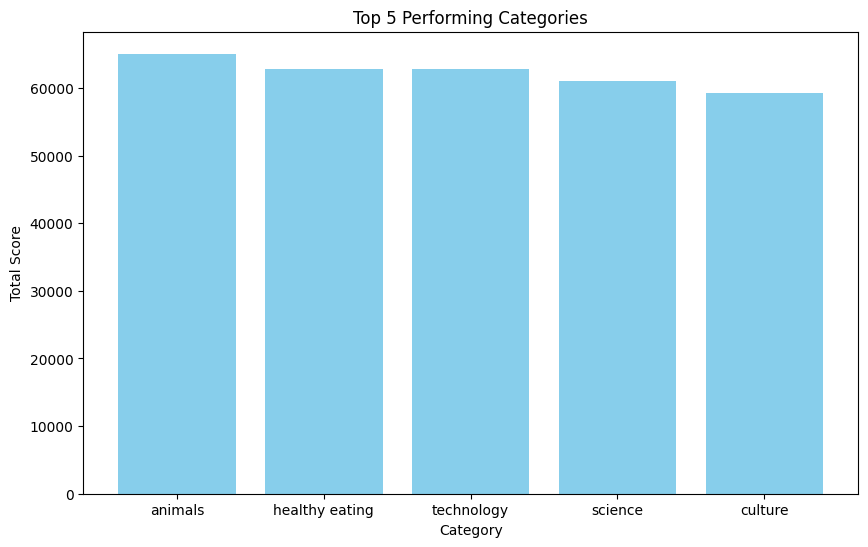

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_categories['Category'], top_categories['Score'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Score')
plt.title('Top 5 Performing Categories')
plt.savefig('Top_5_Categories_Bar_Chart.png')
plt.show()

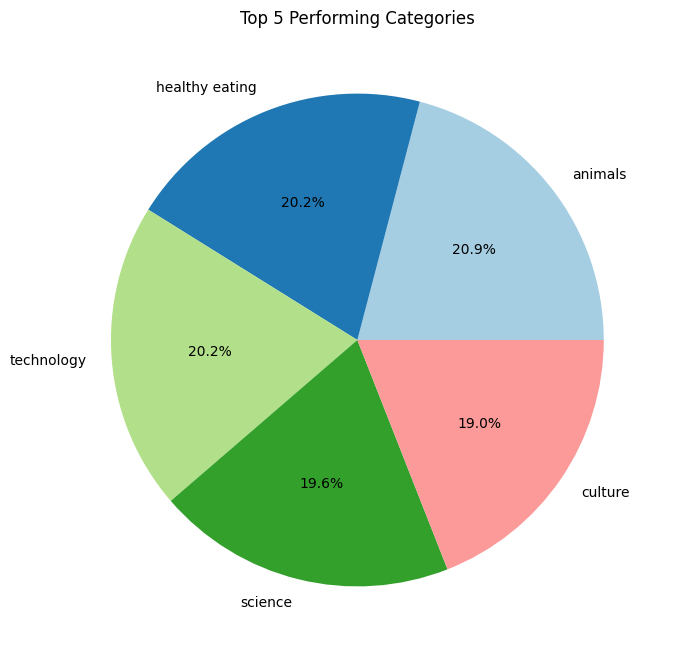

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(top_categories['Score'], labels=top_categories['Category'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Top 5 Performing Categories')
plt.savefig('Top_5_Categories_Pie_Chart.png')
plt.show()

In [ ]:
unique_categories = final_df_cleaned['Category'].nunique()

# Reactions to the most popular category
most_popular_category = top_categories.iloc[0]['Category']
reactions_to_most_popular = final_df_cleaned[final_df_cleaned['Category'] == most_popular_category].shape[0]

# Month with the most posts
final_df_cleaned['Month'] = pd.to_datetime(final_df_cleaned['Datetime']).dt.month
month_with_most_posts = final_df_cleaned['Month'].value_counts().idxmax()

print(f"Number of unique categories: {unique_categories}")
print(f"Reactions to the most popular category ({most_popular_category}): {reactions_to_most_popular}")
print(f"Month with the most posts: {month_with_most_posts}")

Number of unique categories: 29
Reactions to the most popular category (animals): 1653
Month with the most posts: 5


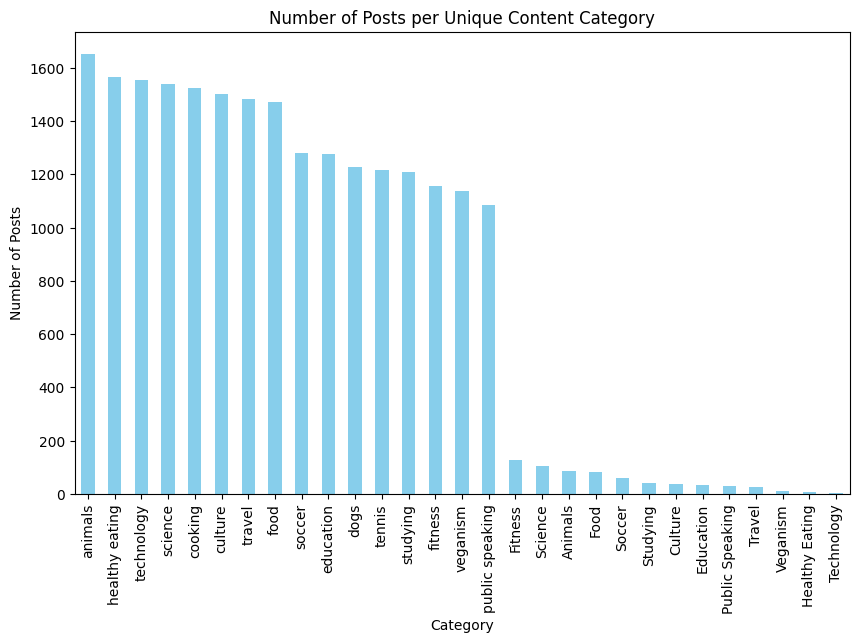

In [ ]:
category_counts = final_df_cleaned['Category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Unique Content Category')
plt.savefig('Unique_Content_Categories.png')
plt.show()

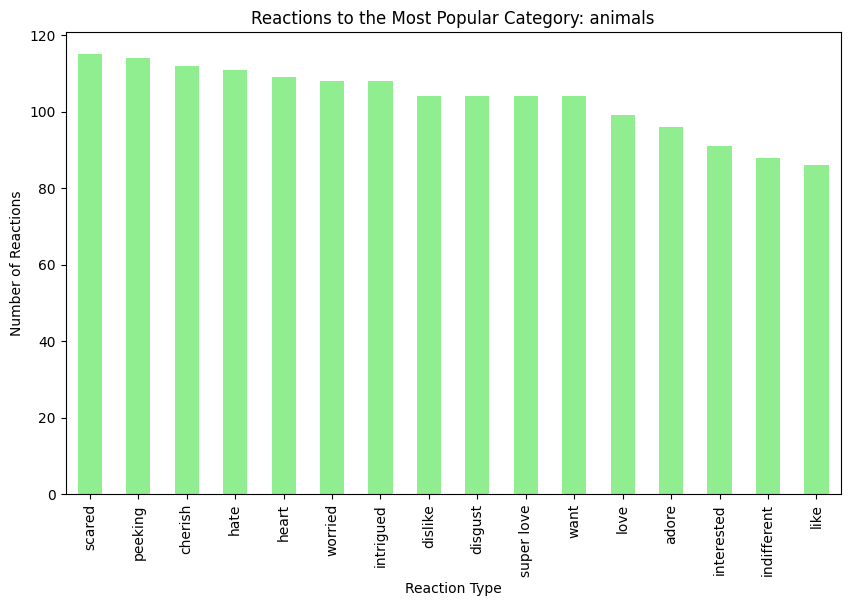

In [ ]:
reactions_to_most_popular = final_df_cleaned[final_df_cleaned['Category'] == most_popular_category]['Type'].value_counts()

plt.figure(figsize=(10, 6))
reactions_to_most_popular.plot(kind='bar', color='lightgreen')
plt.xlabel('Reaction Type')
plt.ylabel('Number of Reactions')
plt.title(f'Reactions to the Most Popular Category: {most_popular_category}')
plt.savefig('Reactions_to_Most_Popular_Category.png')
plt.show()